In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('14-caso-practico-2-data.csv')
category = set(df['CATEGORY'])
city = set(df['CITY'])
df.head()

,INVOICE,BRANCH,CITY,TYPE,GENDER,CATEGORY,COGS,SALES,DATE,TIME,PAYMENT,REVIEW
0,750-67-8428,A,Nueva York,Member,Female,Health and beauty,522.83,548.9715,01/05/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Houston,Normal,Female,Electronic accessories,76.40,80.2200,03/08/2019,10:29,Cash,9.6
2,631-41-3108,A,Nueva York,Normal,Male,Home and lifestyle,324.31,340.5255,03/03/2019,13:23,Credit card,7.4
3,123-19-1176,A,Nueva York,Member,Male,Health and beauty,465.76,489.0480,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Nueva York,Normal,Male,Sports and travel,604.17,634.3785,02/08/2019,10:37,Ewallet,5.3


In [126]:
df['CITY'].value_counts(ascending=True)

Houston       328
Chicago       332
Nueva York    340
Name: CITY, dtype: int64

In [132]:
cat = []
suma = []
for i in category:
    cat.append(i)
    suma.append(sum((df[df.CATEGORY==i]['SALES'])-df[df.CATEGORY==i]['COGS']))

df = {'Category':cat,'Suma':suma}
df_per_cat = pd.DataFrame(df)
df_per_cat.sort_values(['Suma'], ascending=False)

,Category,Suma
5,Food and beverages,2673.5640
3,Sports and travel,2624.8965
1,Electronic accessories,2587.5015
4,Fashion accessories,2585.9950
2,Home and lifestyle,2564.8530
0,Health and beauty,2342.5590


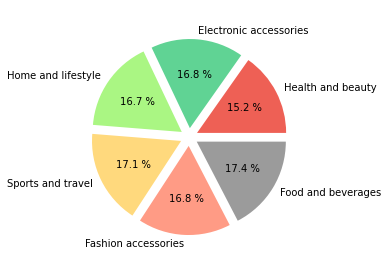

In [133]:
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85","#9B9B9B"]
desfase = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(suma, labels=cat, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.title("Torta por Categoria de compra",{"size":20,"color":"white"})
plt.show()

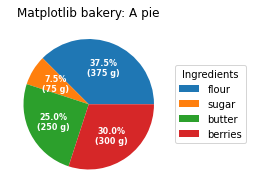

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
    "75 g sugar",
    "250 g butter",
    "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
    textprops=dict(color="w"))

ax.legend(wedges, ingredients,
    title="Ingredients",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

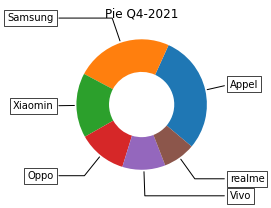

In [6]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["Appel",
    "Samsung",
    "Xiaomin",
    "Oppo",
    "Vivo",
    "realme"]

data = [22, 18, 12, 9, 8, 6]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Pie Q4-2021")

plt.show()